In [ ]:
import pandas as pd
import numpy as np

In [ ]:
alucar = pd.read_csv('alucar.csv')

In [ ]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [ ]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [ ]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print(sns.__version__)
print(pd.__version__)
print(np.__version__)

0.13.1
2.0.3
1.25.2


<Axes: xlabel='mes', ylabel='vendas'>

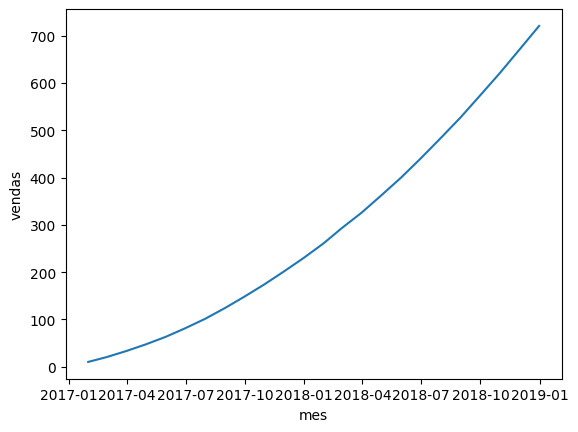

In [ ]:
sns.lineplot(x='mes', y='vendas', data=alucar)

### 1. Estudo de decomposição de vendas

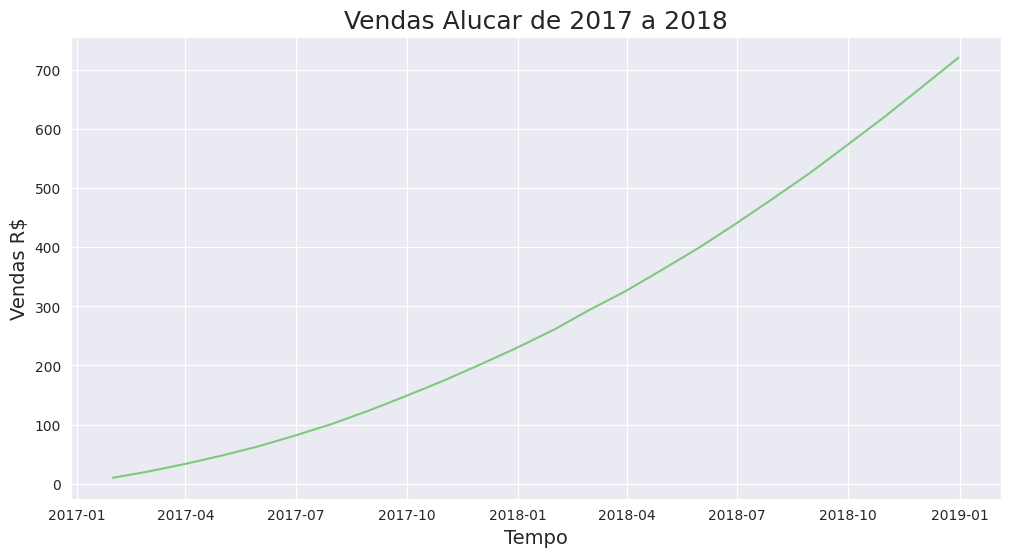

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 a 2018', loc='center', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas R$', fontsize=14)
ax = ax

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()
#diff faz uma posição menos a outra no vendas

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [ ]:
def plotar (titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='center', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

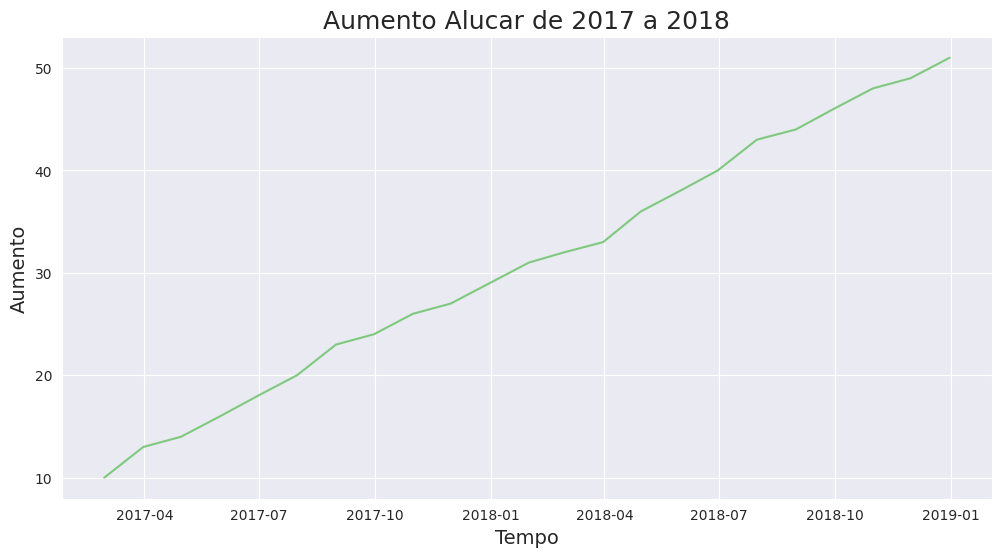

In [ ]:
plotar('Aumento Alucar de 2017 a 2018','Tempo', 'Aumento','mes','aumento', alucar)

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


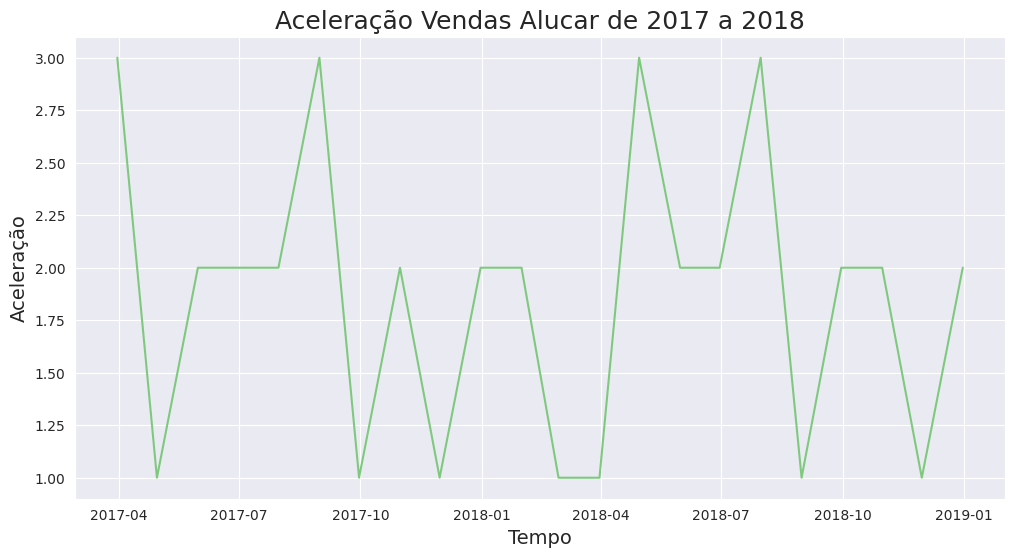

In [ ]:
plotar('Aceleração Vendas Alucar de 2017 a 2018','Tempo', 'Aceleração','mes','aceleracao', alucar)

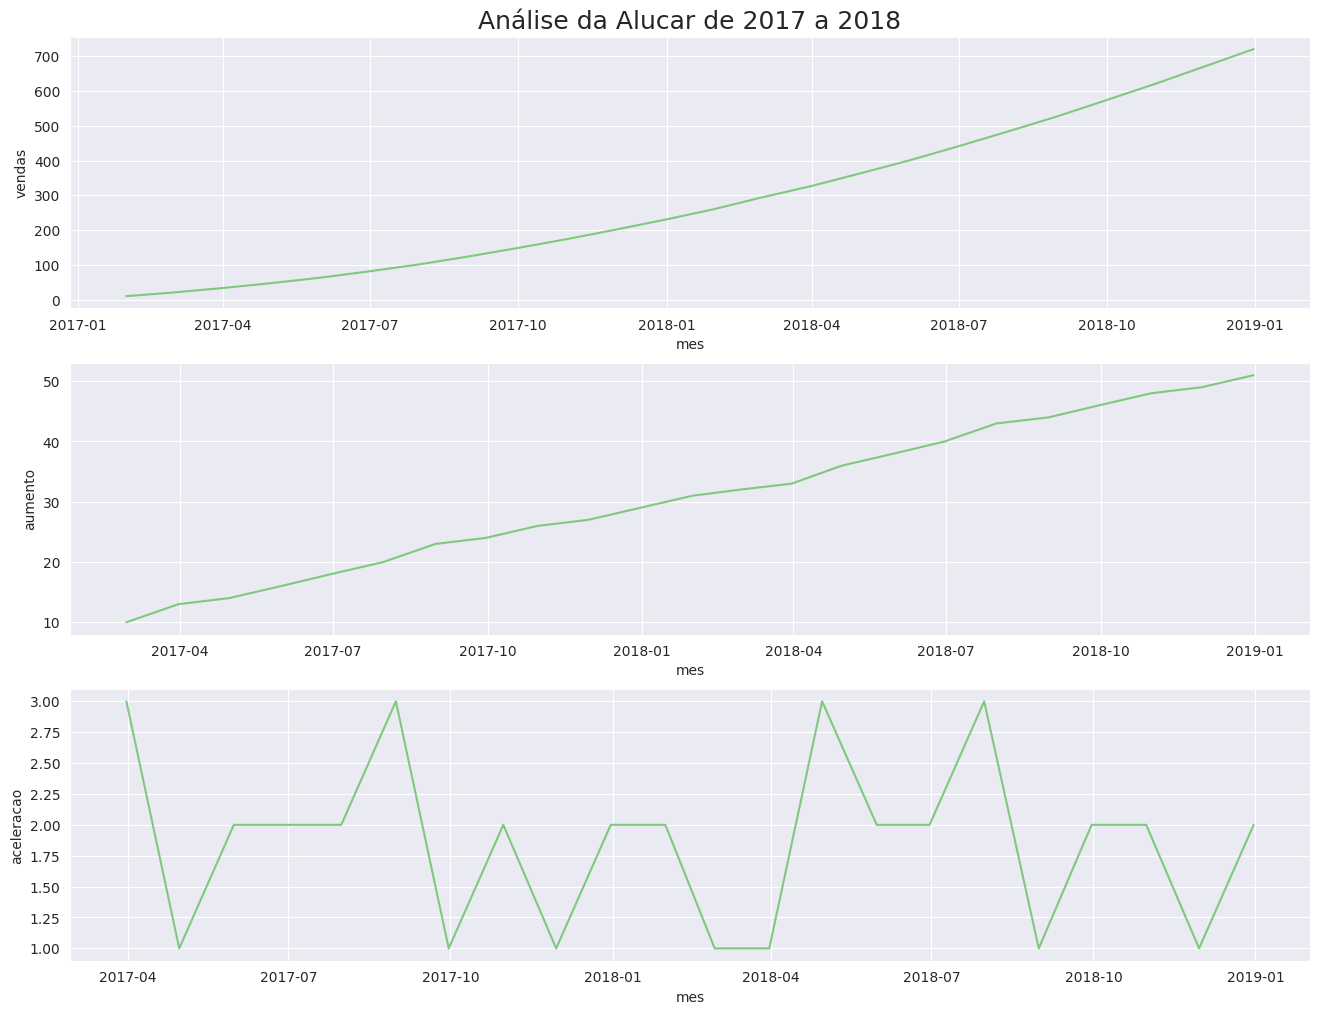

In [ ]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise da Alucar de 2017 a 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [ ]:
def plotar_comparacao(titulo,x, y1, y2, y3, dataset):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18)
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax=ax


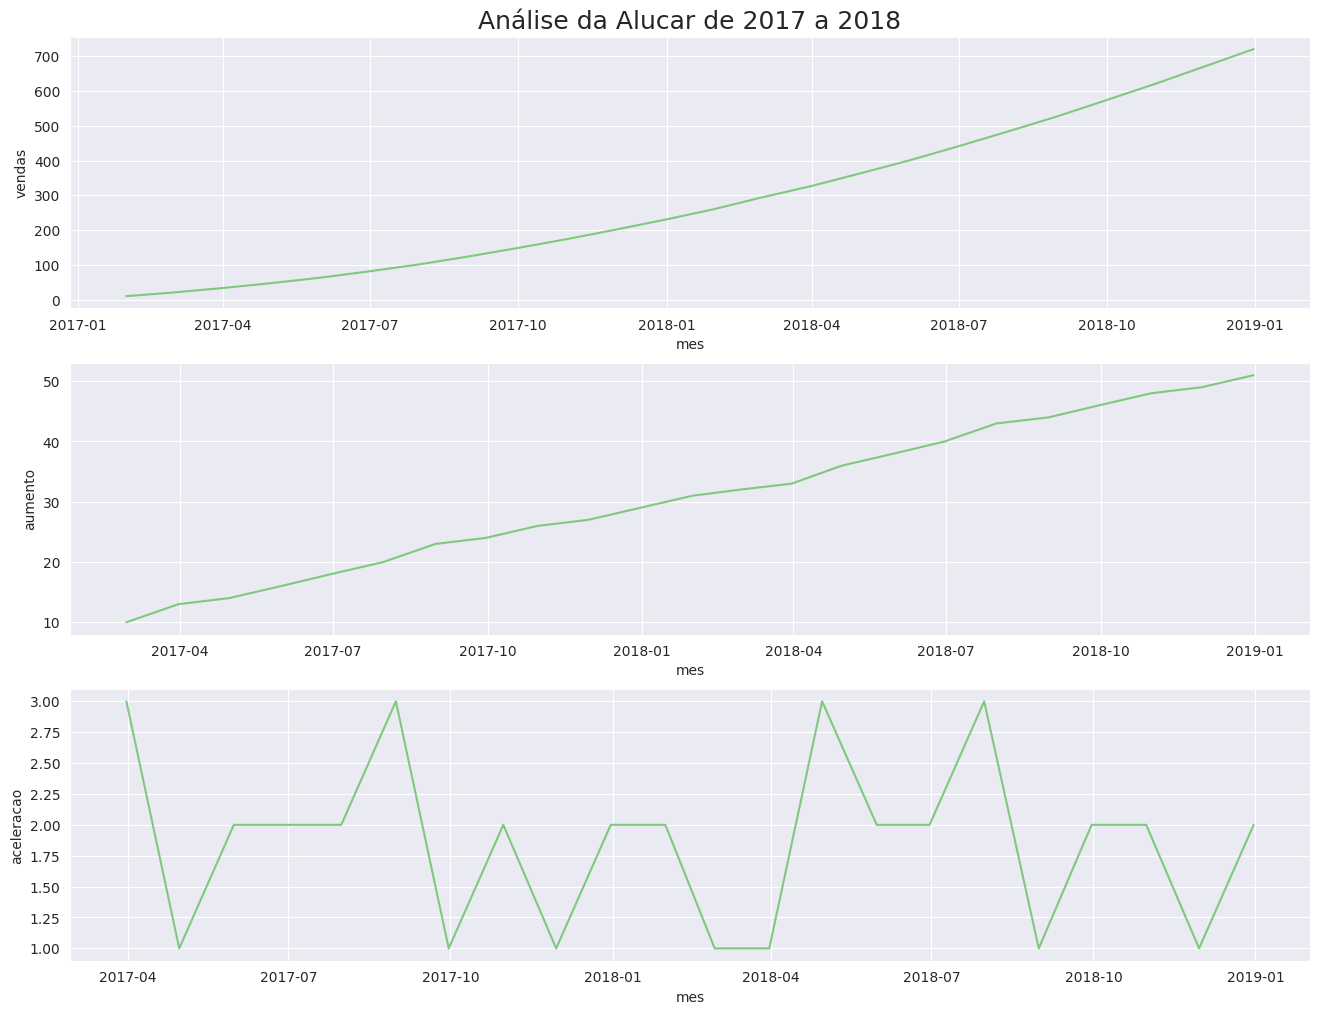

In [ ]:
plotar_comparacao('Análise da Alucar de 2017 a 2018','mes','vendas', 'aumento', 'aceleracao', alucar)

### 2. Estudo de Autocorreção

In [ ]:
from pandas.plotting import autocorrelation_plot

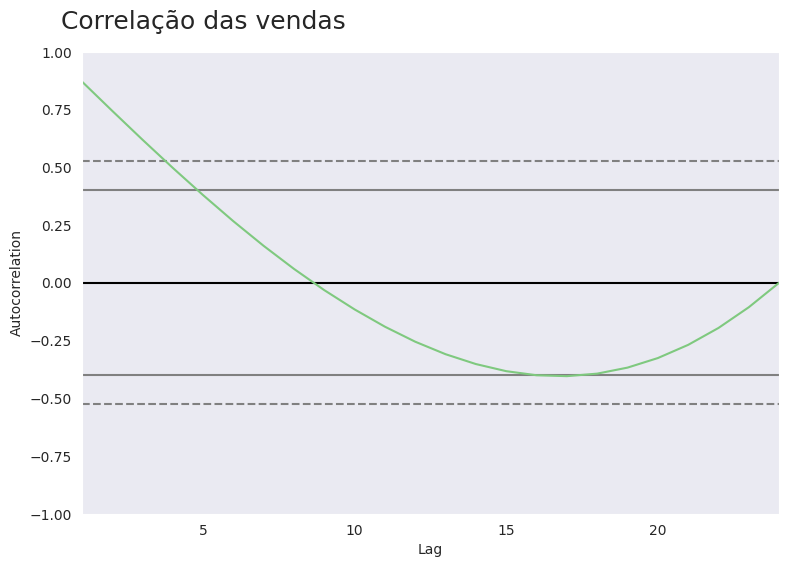

In [ ]:
ax = plt.figure(figsize=(9,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95 )
autocorrelation_plot(alucar['vendas'])
ax =ax

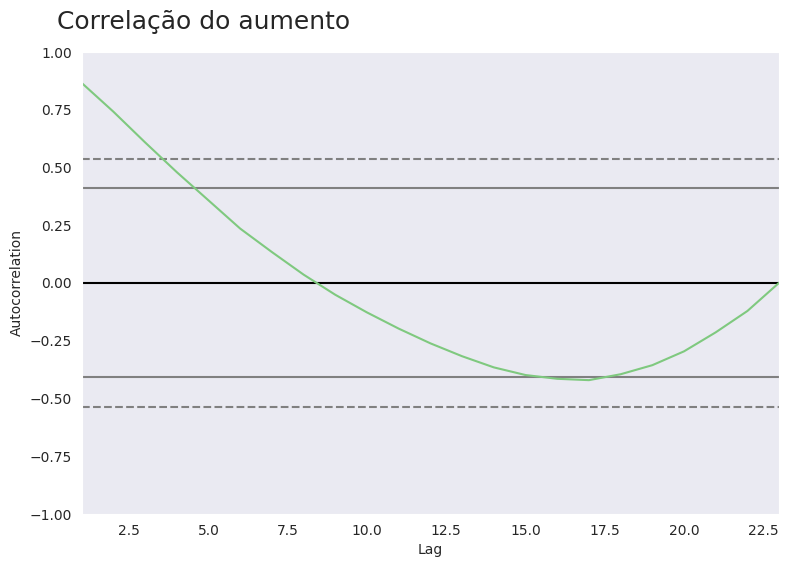

In [ ]:
ax = plt.figure(figsize=(9,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95 )
autocorrelation_plot(alucar['aumento'][1:])
ax =ax

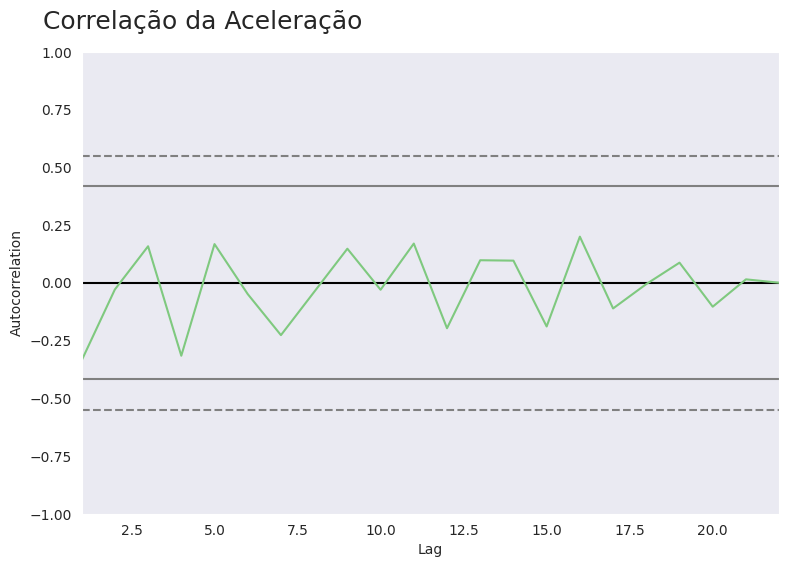

In [ ]:
ax = plt.figure(figsize=(9,6))
ax.suptitle('Correlação da Aceleração', fontsize=18, x=0.26, y=0.95 )
autocorrelation_plot(alucar['aceleracao'][2:])
ax =ax

### 3. Estudo de Sazonalidade

Alucar - Análise de assinantes da newsletter

In [ ]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
assinantes.shape

(24, 2)

In [ ]:
assinantes.isna().sum().sum()

0

In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [ ]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [ ]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


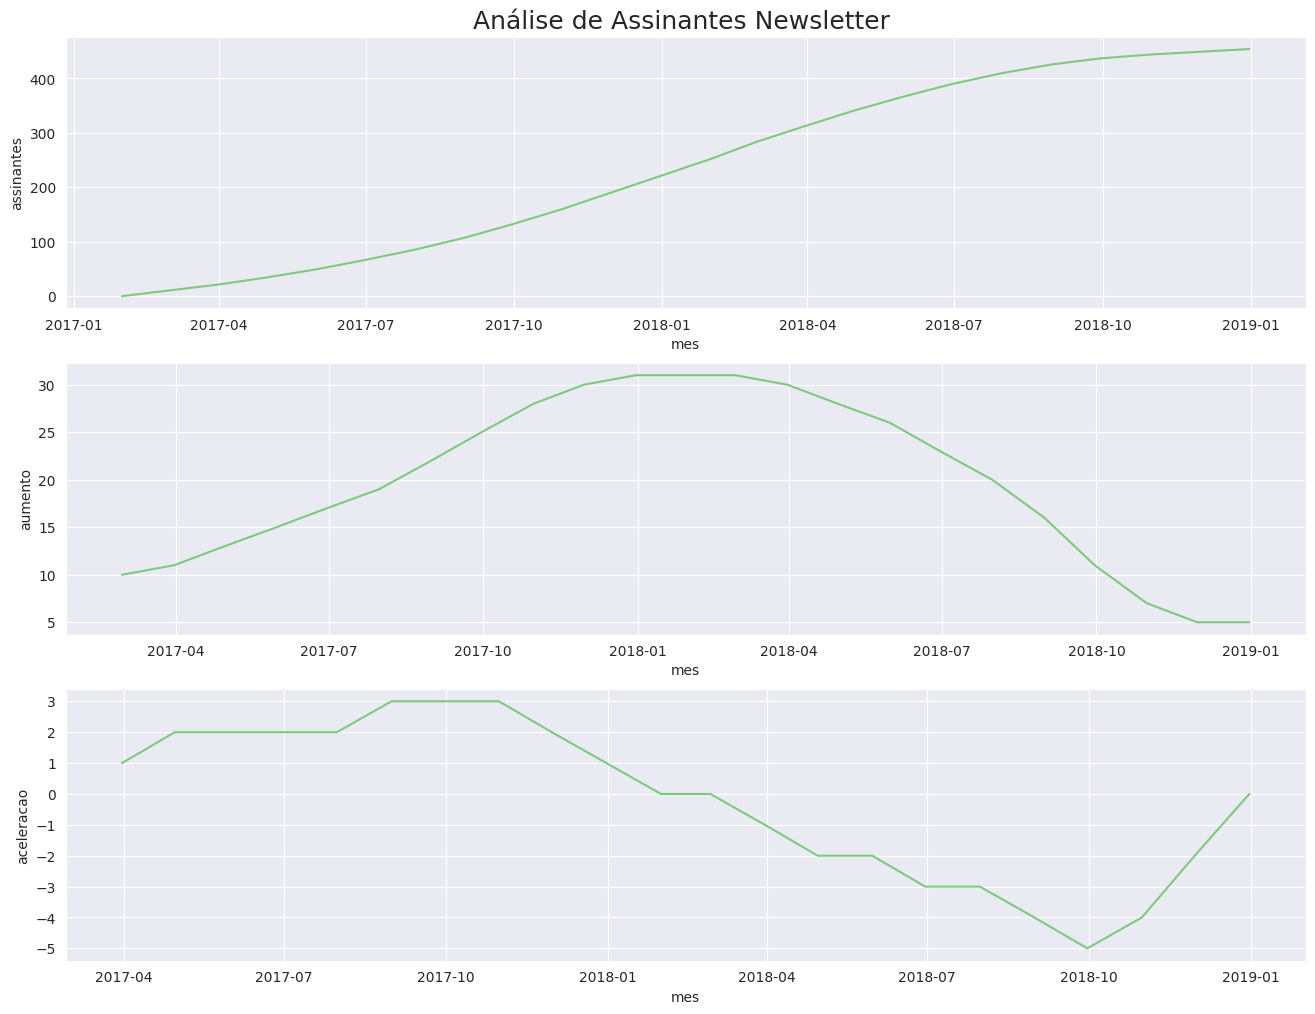

In [ ]:
plotar_comparacao('Análise de Assinantes Newsletter ', 'mes', 'assinantes', 'aumento', 'aceleracao', assinantes)

### Sazonalidade e chocolate

Chocolura - Analisando as vendas

In [ ]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
chocolura.isna().sum().sum()

0

In [ ]:
chocolura.shape

(24, 2)

In [ ]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


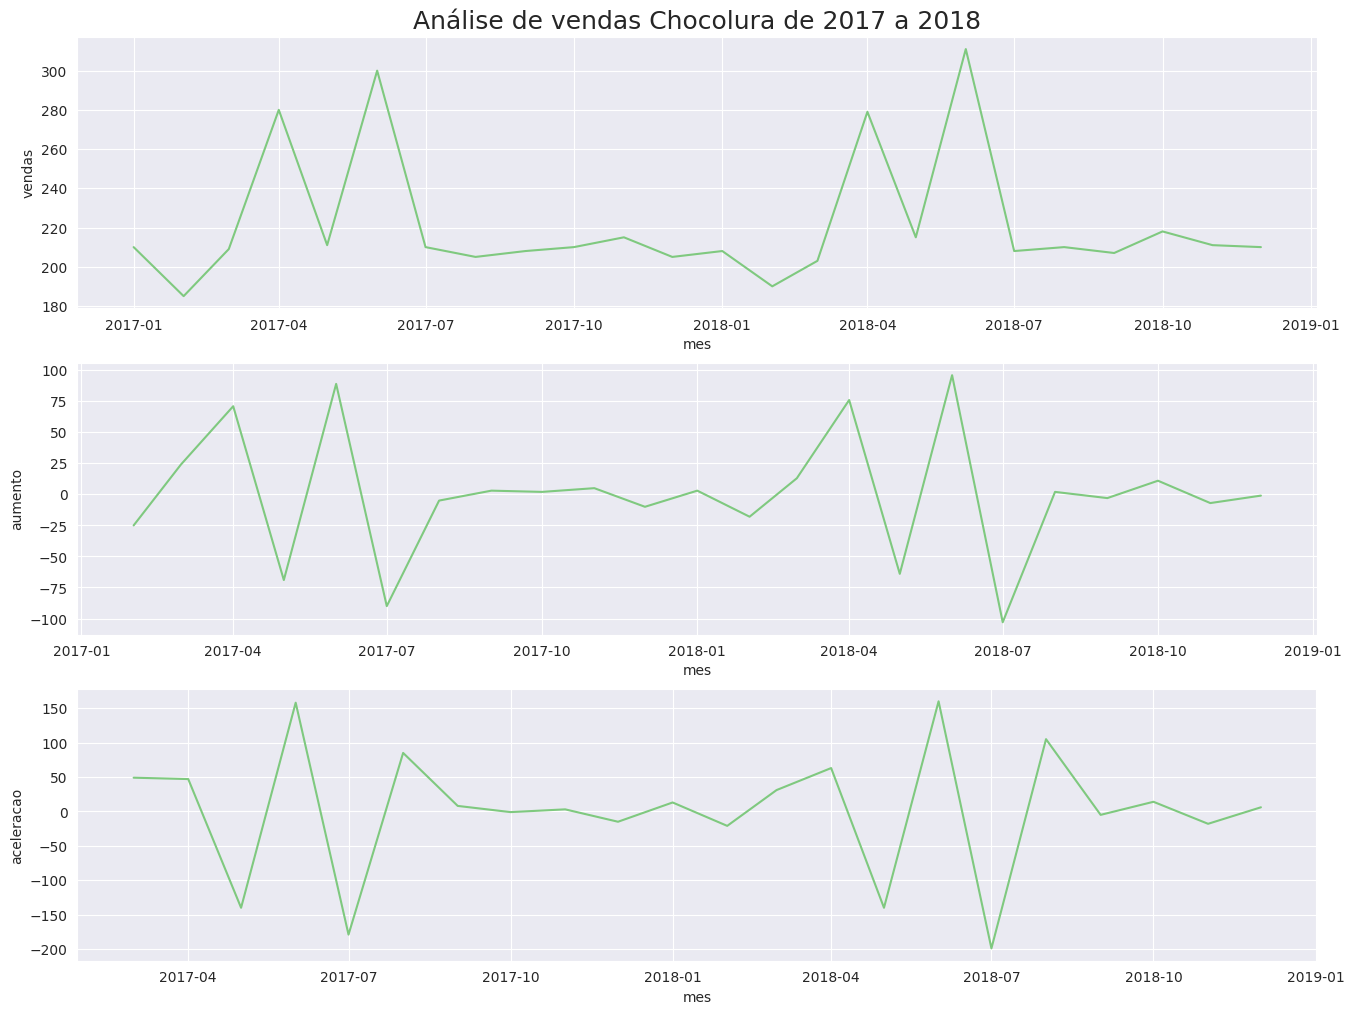

In [ ]:
plotar_comparacao('Análise de vendas Chocolura de 2017 a 2018','mes','vendas', 'aumento', 'aceleracao', chocolura)

In [ ]:
vd_d = pd.read_csv('vendas_por_dia.csv')
vd_d.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
vd_d.shape

(61, 2)

In [ ]:
vd_d.dtypes

dia       object
vendas     int64
dtype: object

In [ ]:
vd_d['dia'] = pd.to_datetime(vd_d['dia'])

In [ ]:
vd_d.isna().sum().sum()

0

In [ ]:
vd_d['aumento'] = vd_d['vendas'].diff()
vd_d['aceleracao'] = vd_d['aumento'].diff()
vd_d.head()


,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


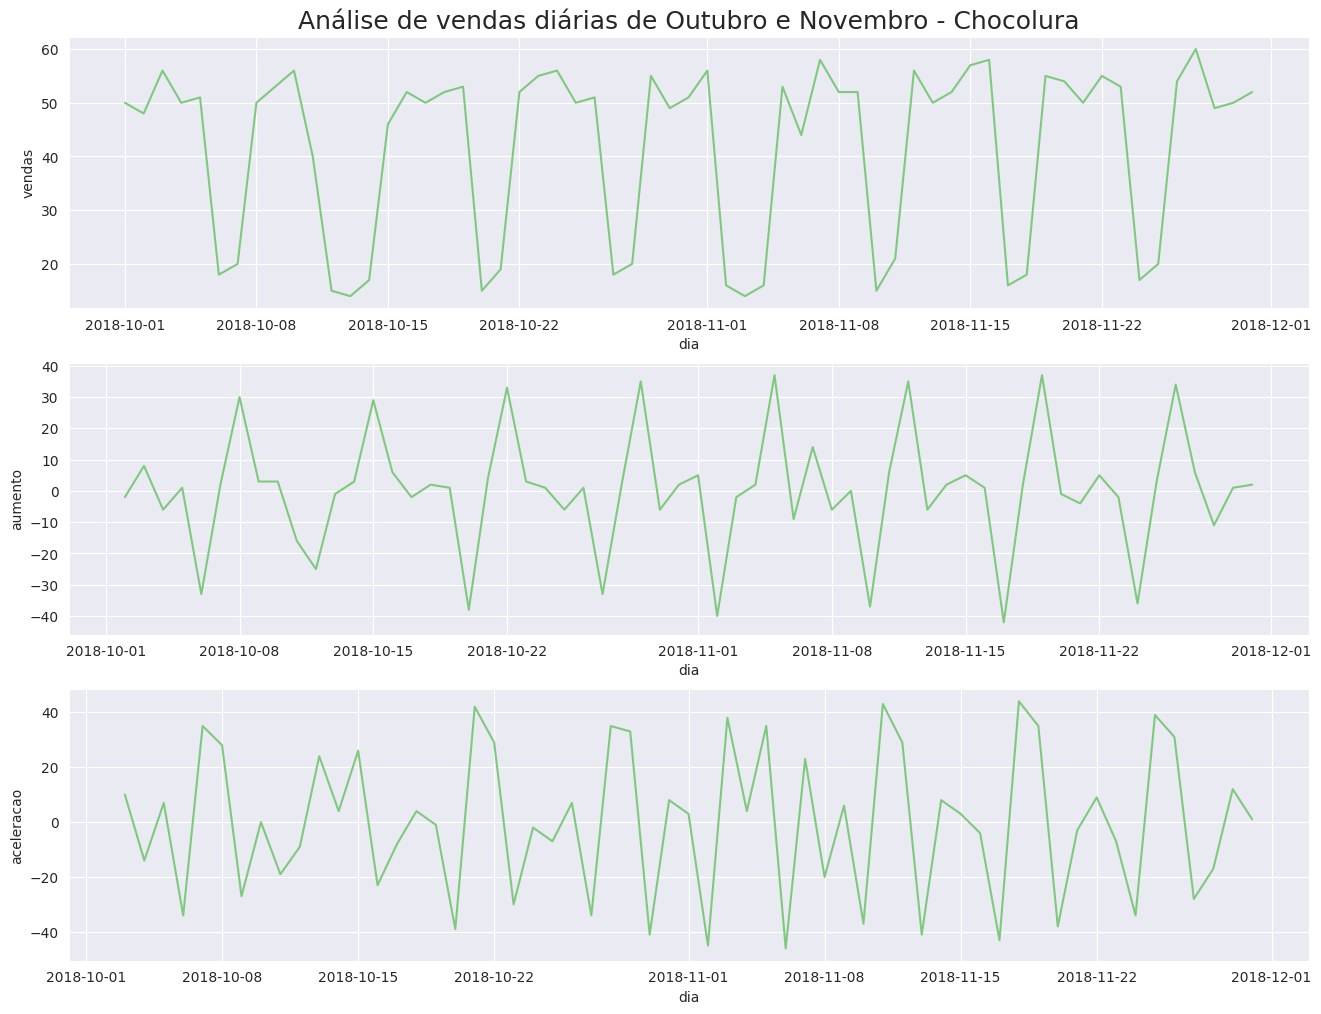

In [ ]:
plotar_comparacao('Análise de vendas diárias de Outubro e Novembro - Chocolura','dia','vendas', 'aumento', 'aceleracao', vd_d)

Analisando Sazonalidade

In [ ]:
vd_d['dia_semana'] = vd_d['dia'].dt.day_name()

In [ ]:
vd_d.head(7)

,dia,vendas,aumento,aceleracao,dia_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [ ]:
vd_d['dia_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terca', 'Wednesday':'Quarta','Thursday':'Quinta','Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}


In [ ]:
vd_d['dia_semana'] = vd_d['dia_semana'].map(dias_traduzidos)
vd_d.head()

,dia,vendas,aumento,aceleracao,dia_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [ ]:
vd_d.head(14)

,dia,vendas,aumento,aceleracao,dia_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


Agrupando os dias

In [ ]:
vd_agrp = vd_d.groupby('dia_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()


In [ ]:
vd_agrp

,vendas,aumento,aceleracao
dia_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terca,52.0,-1.0,-34.0


Correlação das vendas diárias

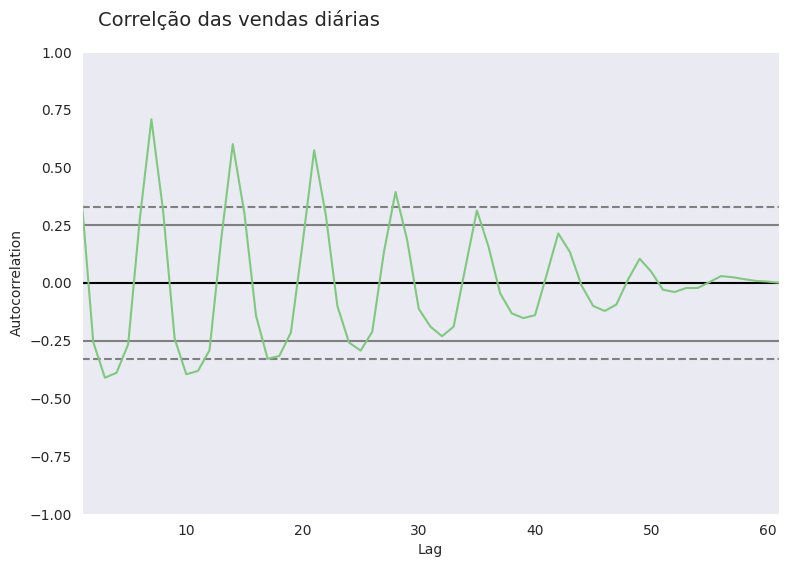

In [ ]:
ax = plt.figure(figsize=(9,6))
ax.suptitle('Correlção das vendas diárias', fontsize=14, x=0.3, y=0.95)
autocorrelation_plot(vd_d['vendas'])
ax=ax

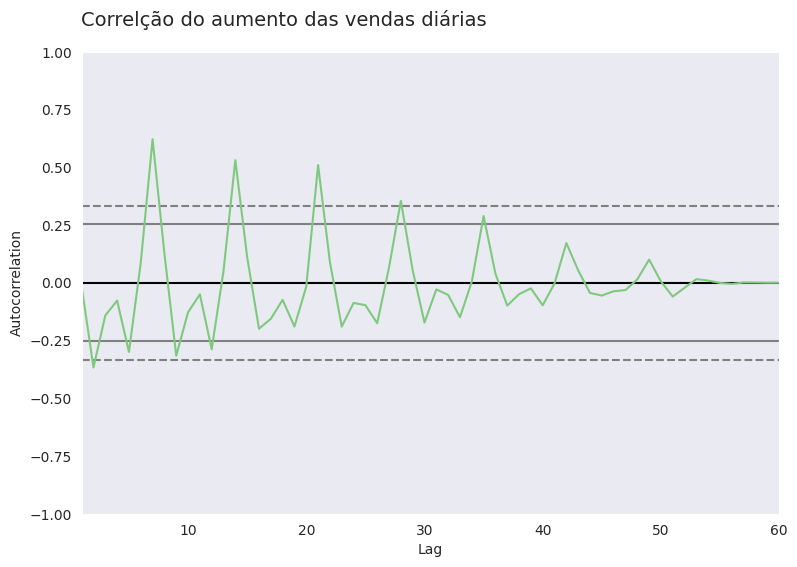

In [ ]:
ax = plt.figure(figsize=(9,6))
ax.suptitle('Correlção do aumento das vendas diárias', fontsize=14, x=0.35, y=0.95)
autocorrelation_plot(vd_d['aumento'][1:])
ax=ax

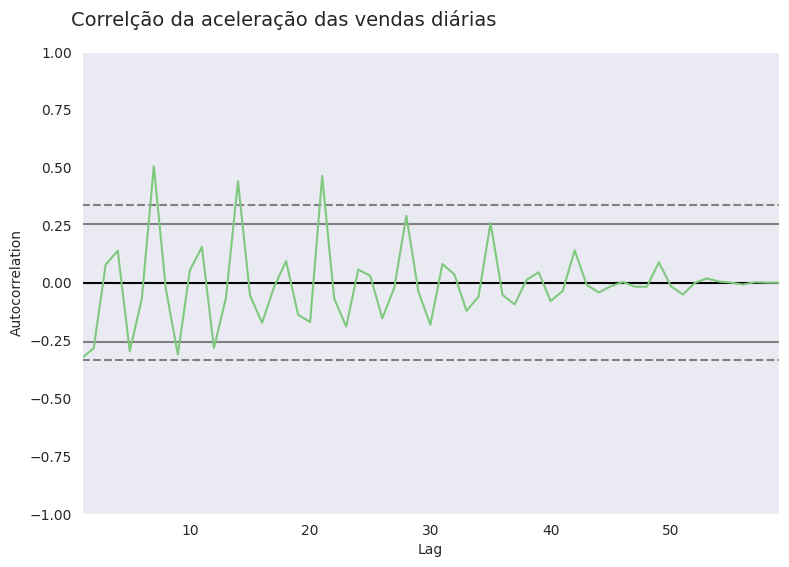

In [ ]:
ax = plt.figure(figsize=(9,6))
ax.suptitle('Correlção da aceleração das vendas diárias', fontsize=14, x=0.35, y=0.95)
autocorrelation_plot(vd_d['aceleracao'][2:])
ax=ax

### Normalização

Cafelura - Análise de vendas

In [ ]:
cfl = pd.read_csv('cafelura.csv')

In [ ]:
print('shape',cfl.shape)
print('nulos', cfl.isna().sum().sum())
print('tipo dados colunas:', cfl.dtypes)

shape (24, 2)
nulos 0
tipo dados colunas: mes       object
vendas     int64
dtype: object


In [ ]:
cfl['mes'] = pd.to_datetime(cfl['mes'])

In [ ]:
print('tipo dados colunas:', cfl.dtypes)

tipo dados colunas: mes       datetime64[ns]
vendas             int64
dtype: object


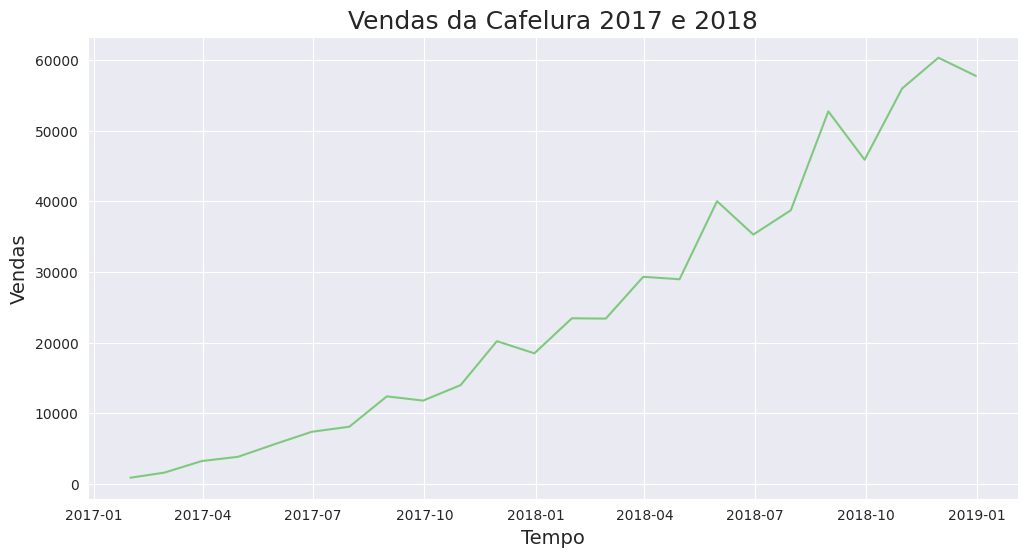

In [ ]:
plotar('Vendas da Cafelura 2017 e 2018', 'Tempo', 'Vendas','mes','vendas', cfl)

In [ ]:
qtd_d_fds = pd.read_csv('dias_final_de_semana.csv')
qtd_d_fds.head(12)

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8
7,10
8,8
9,8


In [ ]:
qtd_d_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
cfl['vendas_normalizadas'] = cfl['vendas'] / qtd_d_fds['quantidade_de_dias'].values
cfl.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


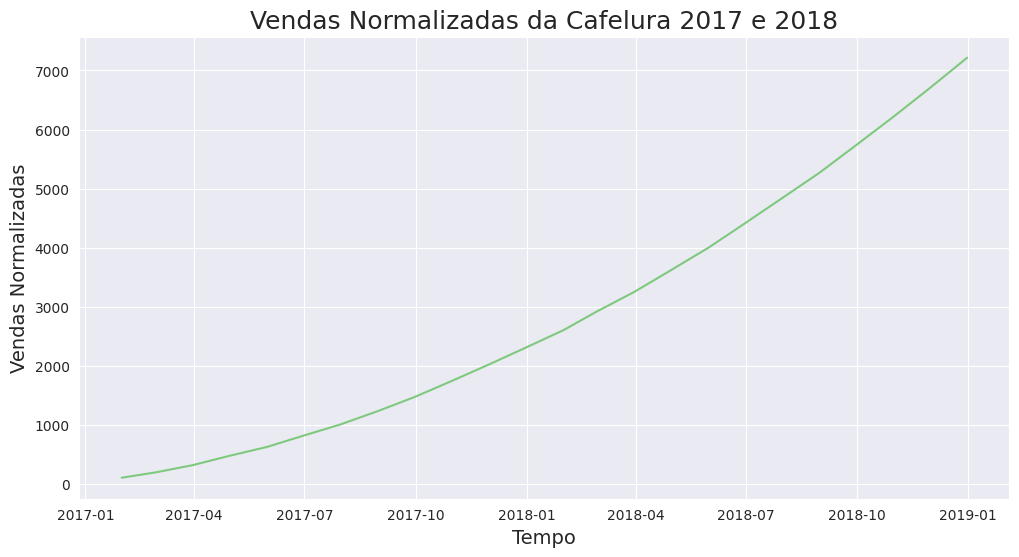

In [ ]:
plotar('Vendas Normalizadas da Cafelura 2017 e 2018', 'Tempo', 'Vendas Normalizadas','mes','vendas_normalizadas', cfl)

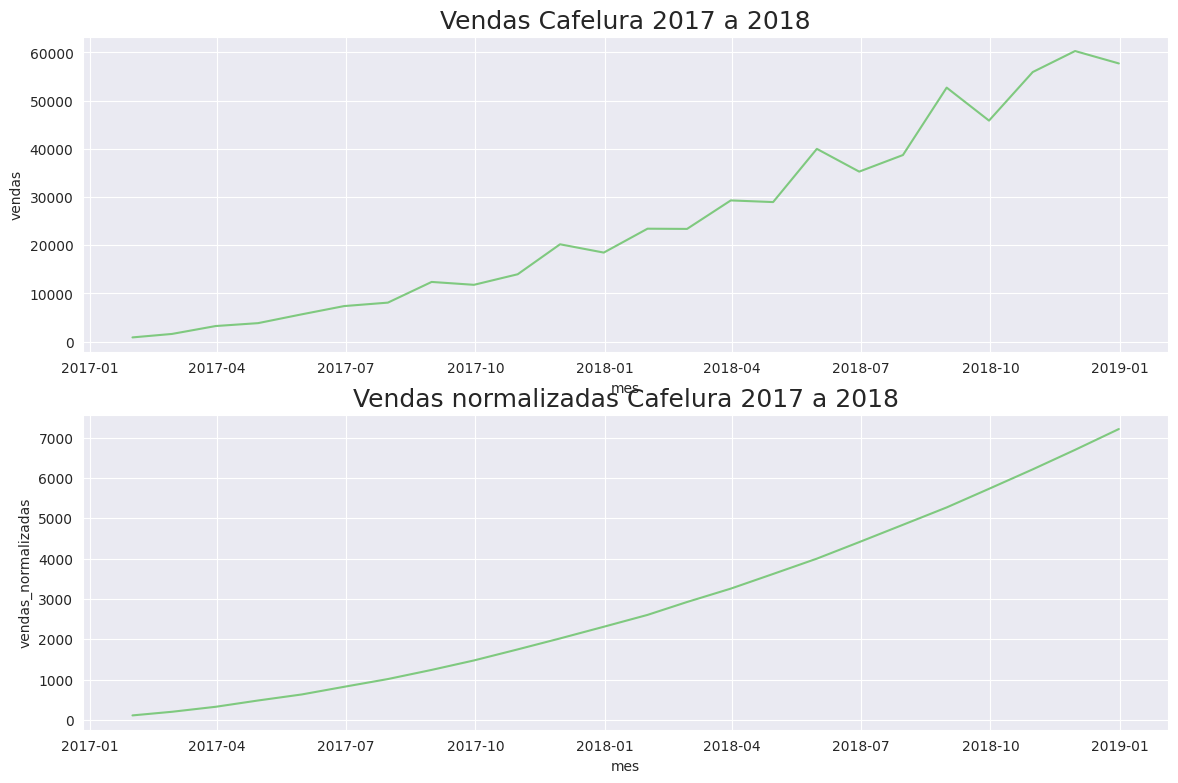

In [ ]:
plt.figure(figsize=(14,9))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 a 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cfl)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 a 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cfl)
ax=ax

### Statsmodel

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

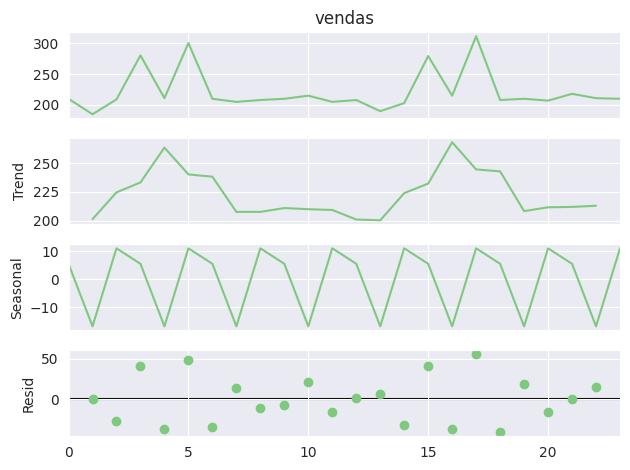

In [ ]:
result = seasonal_decompose(chocolura['vendas'], period=3)
ax = result.plot()

In [ ]:
obs = result.observed
trend = result.trend
seasonal = result.seasonal
resid = result.resid

In [ ]:
data =({
      'obs': obs,
      'trend': trend,
      'seasonal':seasonal,
      'resid':resid
})
result = pd.DataFrame(data)
result.head()

,obs,trend,seasonal,resid
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


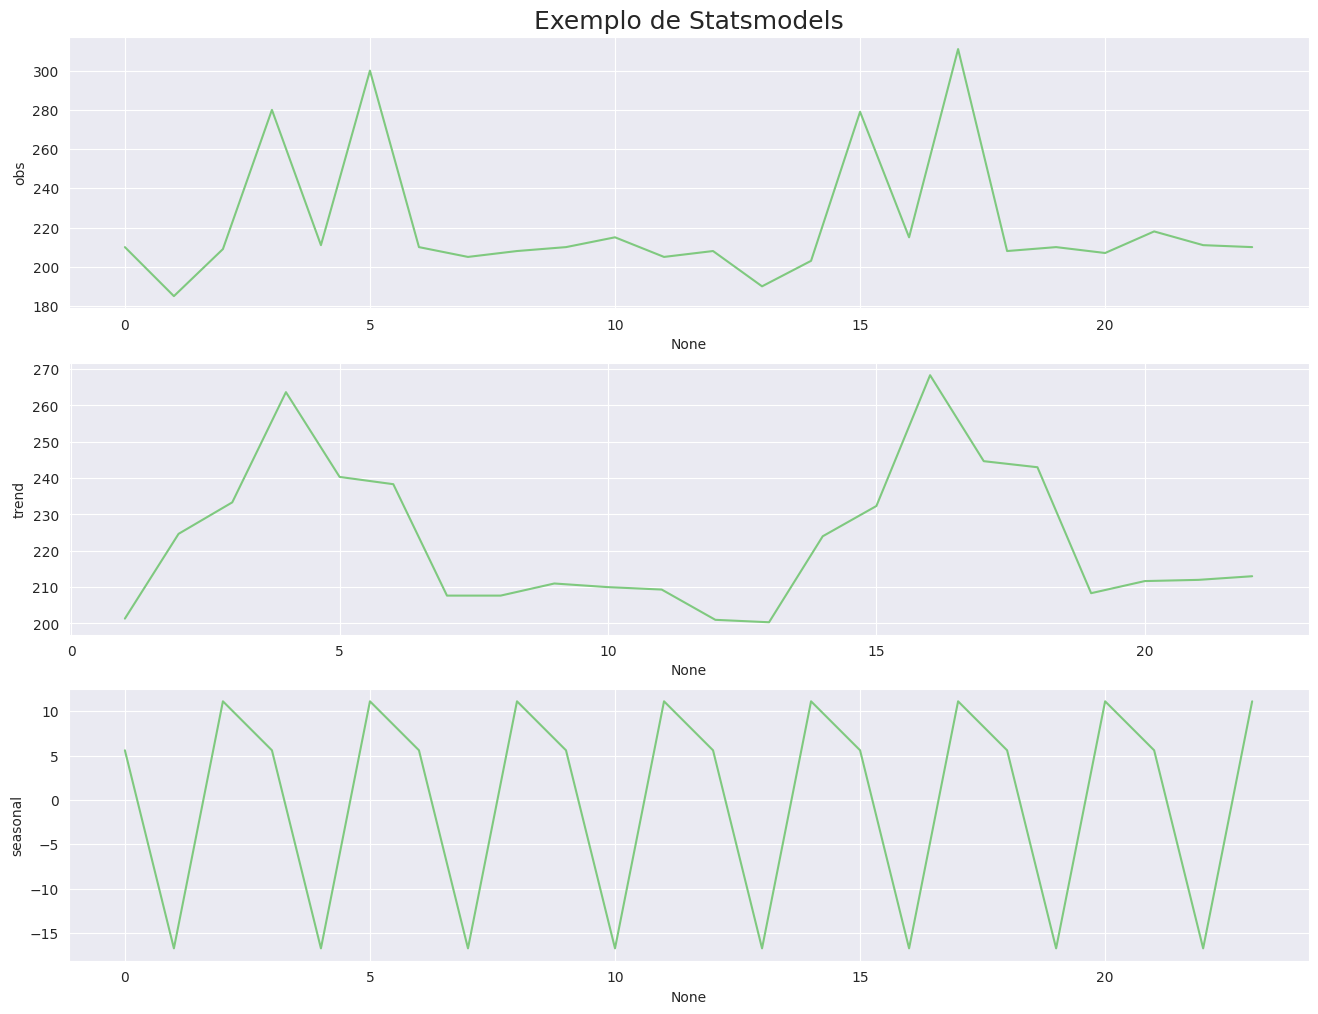

In [ ]:
plotar_comparacao('Exemplo de Statsmodels',result.index, 'obs','trend', 'seasonal', result)

Alucel - Análise de vendas

In [ ]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [ ]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('shape', alucel.shape)
print('nulos', alucel.isna().sum().sum())

shape (61, 2)
nulos 0


In [ ]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [ ]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


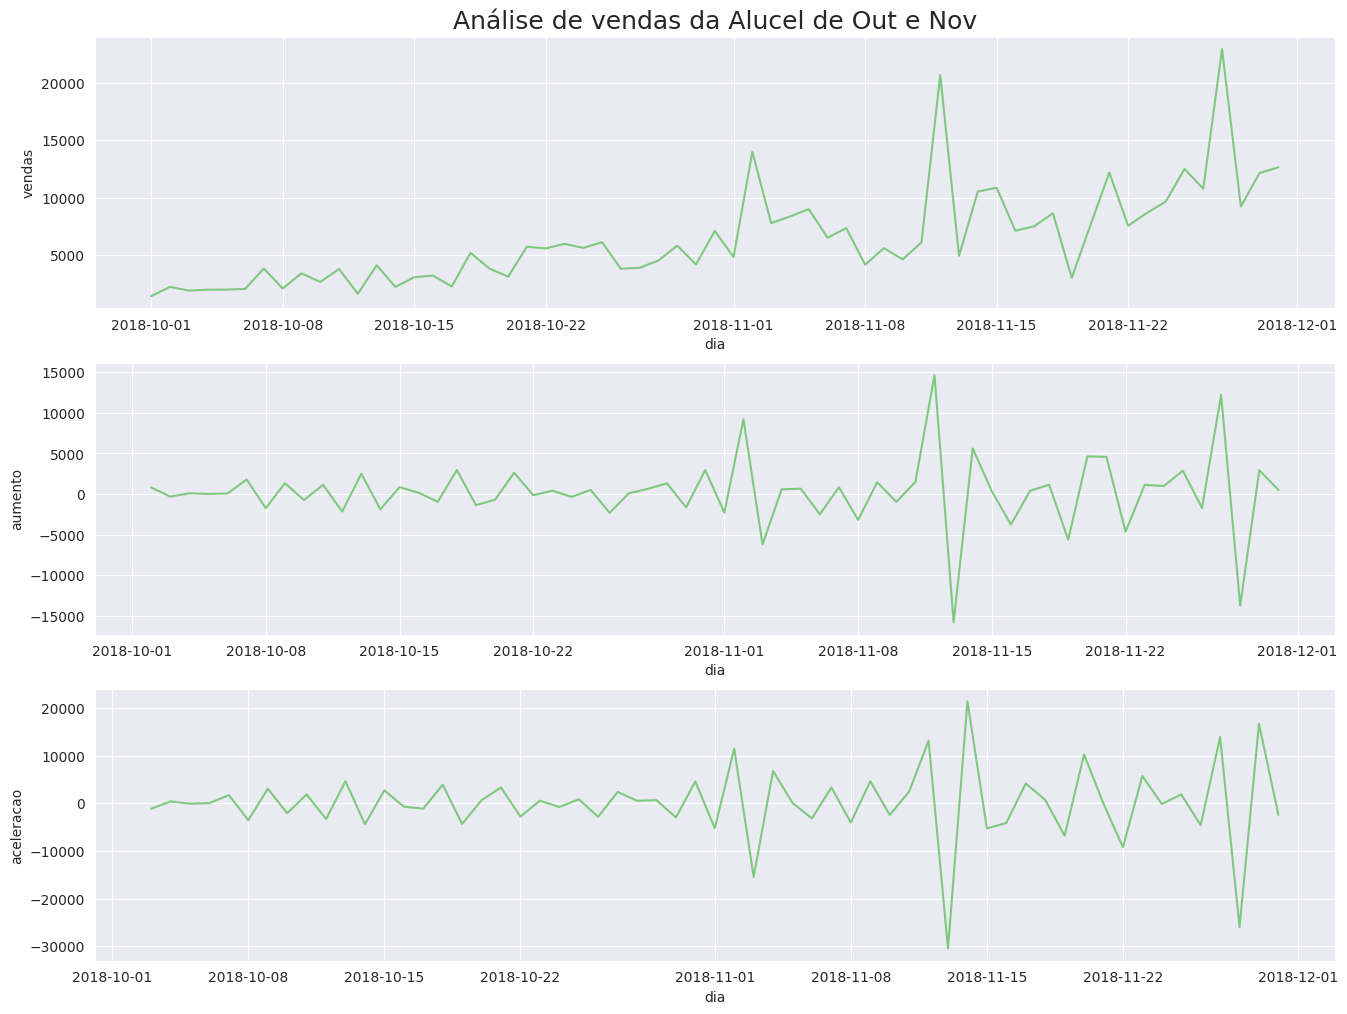

In [ ]:
plotar_comparacao('Análise de vendas da Alucel de Out e Nov','dia','vendas','aumento','aceleracao',alucel)

### Média móvel

In [ ]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [ ]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


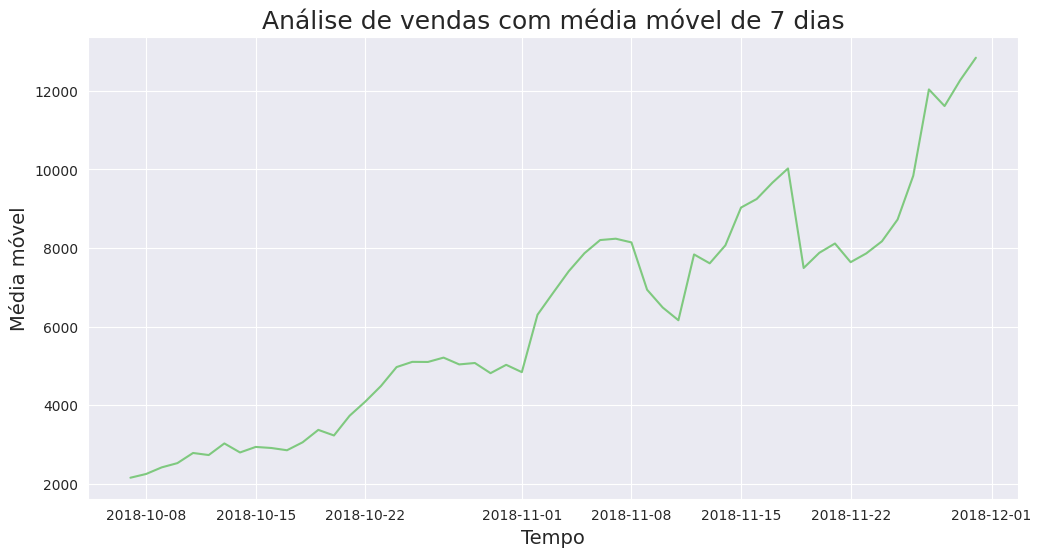

In [ ]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média móvel','dia','media_movel',alucel)

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

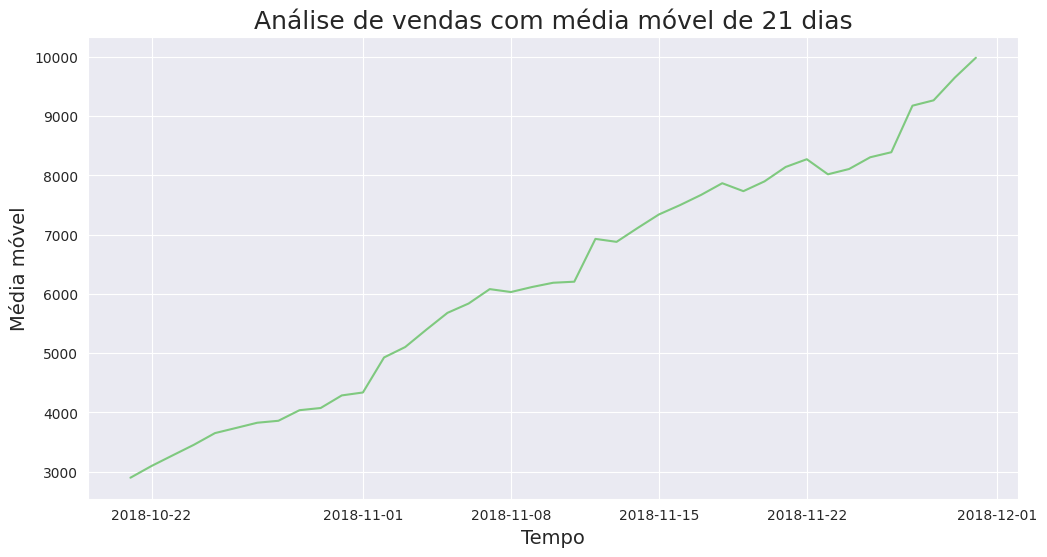

In [ ]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média móvel','dia','media_movel_21',alucel)

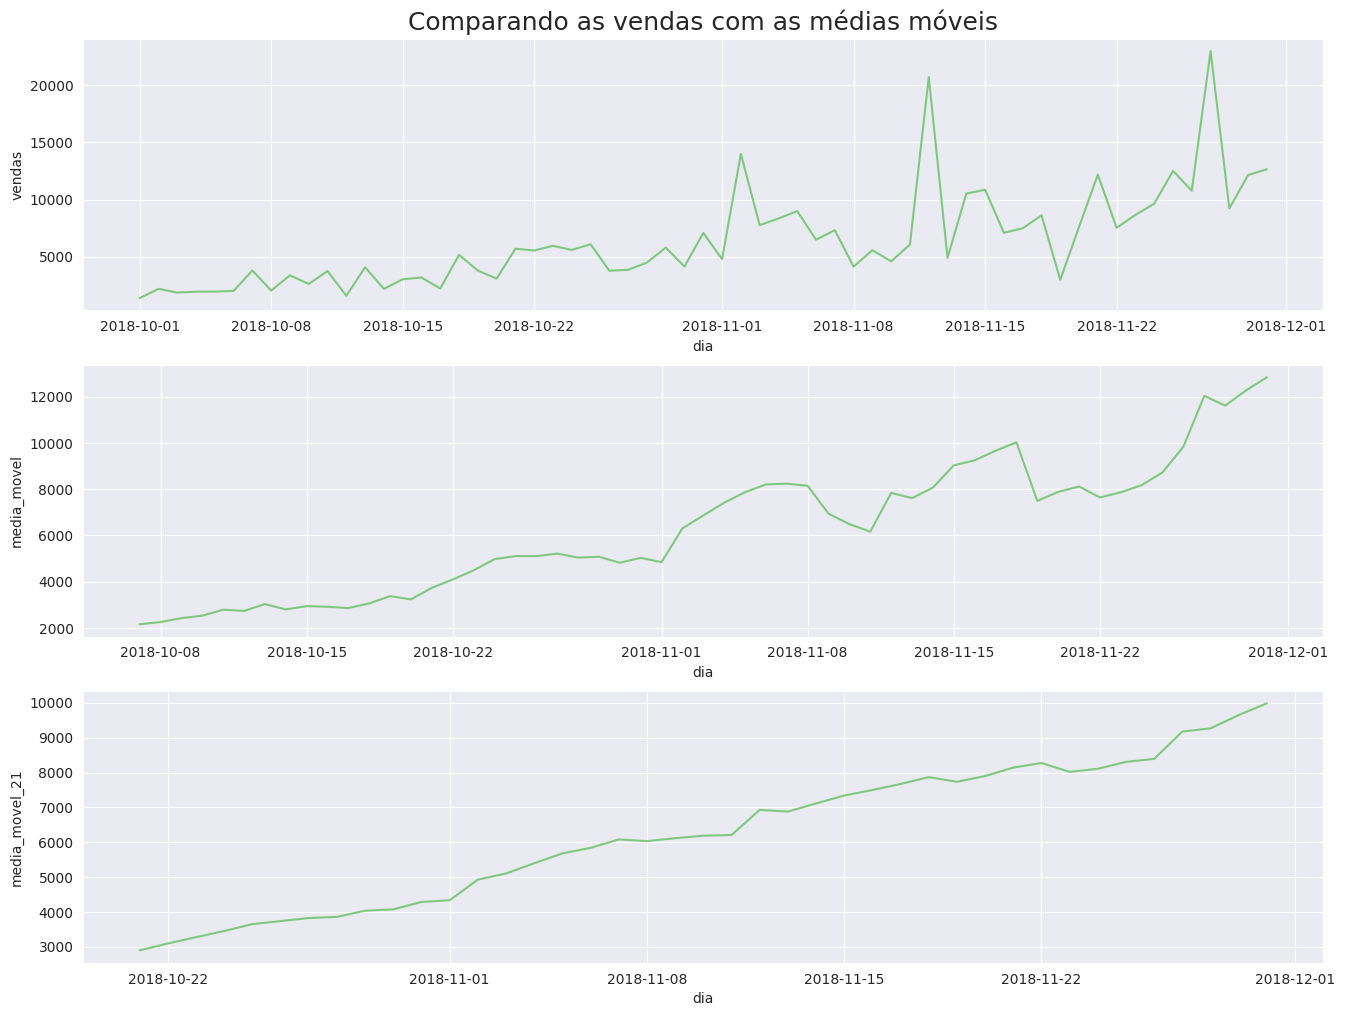

In [ ]:
plotar_comparacao('Comparando as vendas com as médias móveis','dia','vendas','media_movel','media_movel_21',alucel)

In [ ]:


def plotar_comparacaob(titulo, x, y1, y2, y3, dataset):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(1, 1, 1)  # Um único subplot
    ax.set_title(titulo, fontsize=18)
    sns.lineplot(x=x, y=y1, data=dataset, label=y1)
    sns.lineplot(x=x, y=y2, data=dataset, label=y2)
    sns.lineplot(x=x, y=y3, data=dataset, label=y3)
    ax.set_xlabel(x, fontsize=14)
    ax.set_ylabel('Values', fontsize=14)
    plt.legend()
    plt.show()

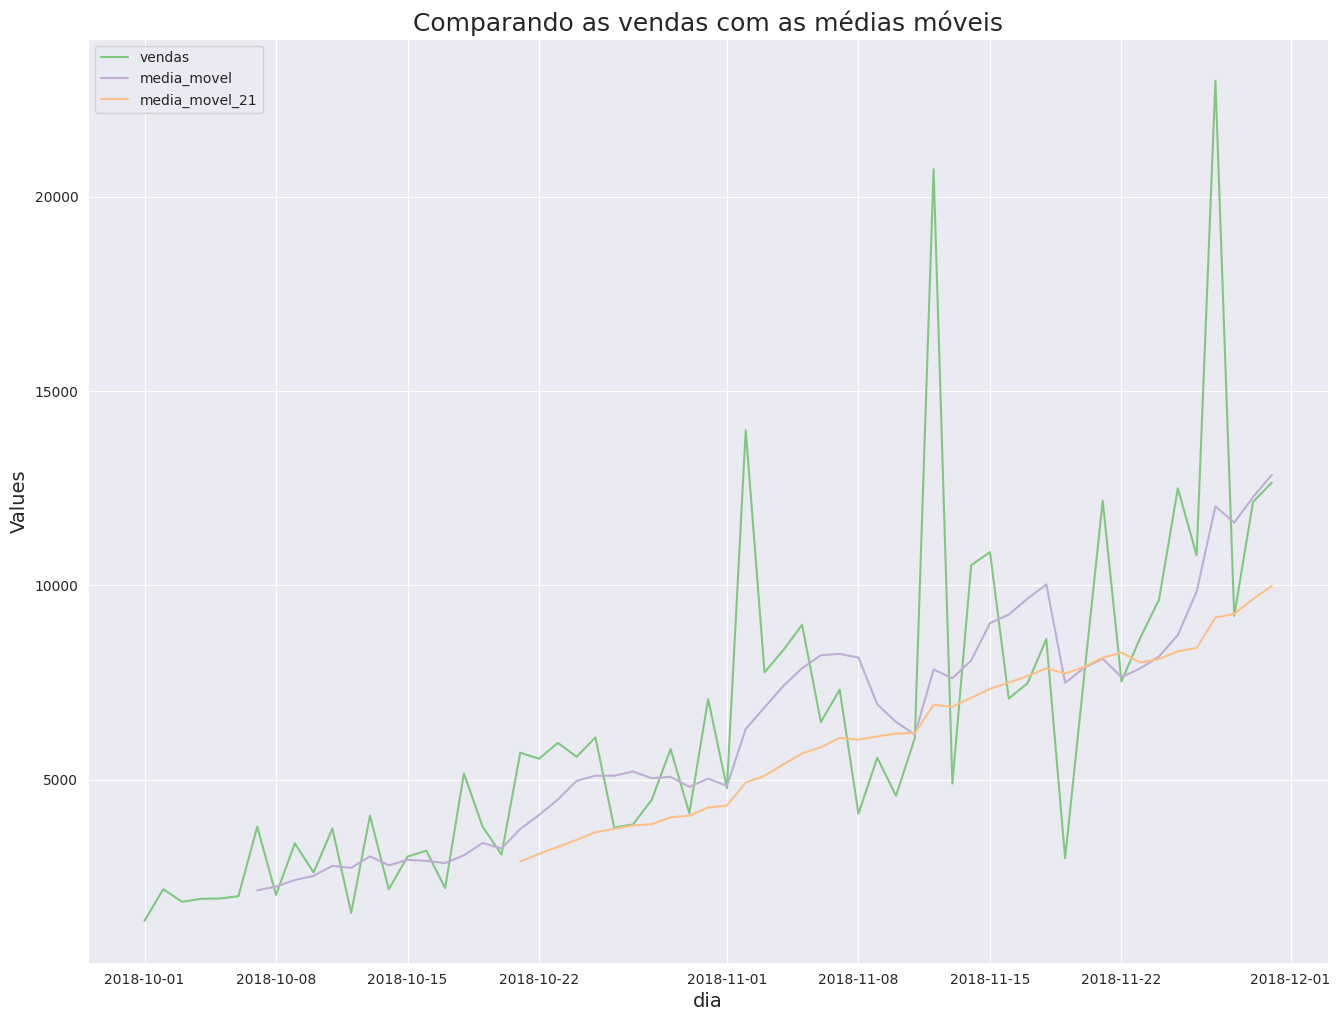

In [ ]:
plotar_comparacaob('Comparando as vendas com as médias móveis', 'dia', 'vendas', 'media_movel', 'media_movel_21', alucel)